In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
# Loading CSV
datafile = pd.read_csv("TSLA2.csv")
N_data_points = len(datafile)
datafile.head(3)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-09,51.816002,52.590000,51.358002,51.584000,51.584000,16670500
1,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
2,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500


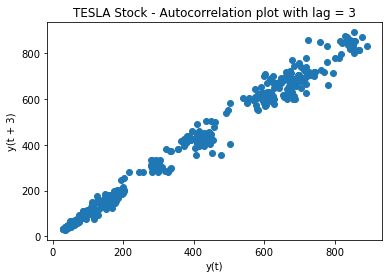

In [3]:
# Plotting lag plot to see if this data is a good fit for ARIMA
plt.figure()
lag_plot(datafile['Open'], lag=3)
plt.title('TESLA Stock - Autocorrelation plot with lag = 3')
plt.show()

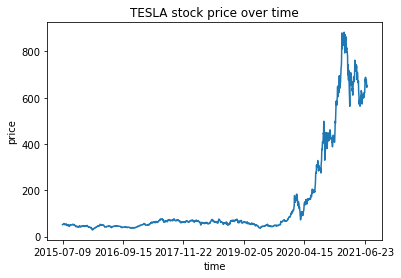

In [12]:
plt.plot(datafile["Date"], datafile["Close"])
plt.xticks(np.arange(0, N_data_points, 300), datafile['Date'][0:N_data_points:300])
plt.title("TESLA stock price over time")
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [5]:
p_train = 0.7
p_test = 0.3
train_data, test_data = datafile[0:int(N_data_points*p_train)], datafile[int(N_data_points*p_test):]

training_data = train_data['Close'].values
test_data = test_data['Close'].values

history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)

for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)

MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 152.5521720571964


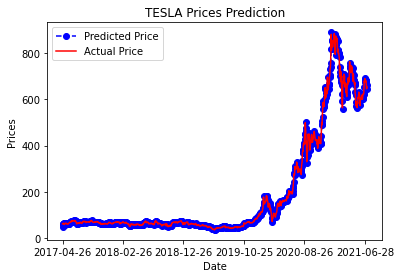

In [14]:
test_set_range = datafile[int(N_data_points*p_test):].index

plt.plot(
    test_set_range, 
    model_predictions, 
    color='blue', 
    marker='o', 
    linestyle='dashed', 
    label='Predicted Price'
)
plt.plot(
    test_set_range, 
    test_data, 
    color='red', 
    label='Actual Price'
)
plt.title('TESLA Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(
    np.arange(int(N_data_points*p_test),N_data_points,210), 
    datafile.Date[int(N_data_points*p_test):N_data_points:210]
)
plt.legend()

plt.show()